In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
Addtrain = pd.read_csv("/content/train_v2_drcat_02.csv")
df = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/61542/6888007/compressed/train_essays.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1701656992&Signature=XCiGbjyCD05XYCWzQEoFEFPzcL0E%2BCGIsBqMEW8T4BPe5VVlJY09O6ZpchVjj3dPSkLB%2B%2FmrkLk8kH2L6GZ9VRTo9Ym5ld56KGNYtPd93h9HSqftfeOO%2BdqKs9i5zidU3lUVigIC7n6OjxiiWU7HGA4JsoxjcKYfgvyhzFnHv1znxsV%2BOhP0XT8AacA%2F%2BpEguzENuQXSDLP6m3uSH%2B3WsWNfJwJTwVatWrpe96OUoZVzm5LHVnI1fio3P50XC7PTQ5myWMgDRVNTfFqPs2964QwcOu83pxIxBtXbFoR9sTK0czKXA6nXvkz8FBiDdRH%2FRNRu1s2pvPHhe3bXUhG8SA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_essays.csv.zip")

In [3]:
Addtrain.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [4]:
Addtrain.drop('prompt_name',axis=1,inplace=True)
Addtrain.drop('source',axis=1,inplace=True)
Addtrain.drop('RDizzl3_seven',axis=1,inplace=True)
Addtrain['text'] = Addtrain['text'].str.replace('\n', '')

In [5]:
Addtrain.rename(columns = {'label':'generated'}, inplace = True)
Addtrain['generated'] = Addtrain['generated'].apply(str)
Addtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44868 non-null  object
 1   generated  44868 non-null  object
dtypes: object(2)
memory usage: 701.2+ KB


In [6]:
Addtrain.generated.value_counts()

0    27371
1    17497
Name: generated, dtype: int64

In [7]:
df.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [8]:
df.drop('id',axis=1,inplace=True)
df.drop('prompt_id',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1378 non-null   object
 1   generated  1378 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.7+ KB


In [10]:
df['generated'] = df['generated'].apply(str)
df = pd.concat([df, Addtrain], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46246 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [11]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [12]:
test_df=df.sample(frac=0.2)
train_df=df.drop(test_df.index)
print ("Number of samples in the train data: ", train_df.shape[0])
print ("Number of samples in the development data: ", test_df.shape[0])

Number of samples in the train data:  36541
Number of samples in the development data:  9249


In [13]:
#df['generated'] = df['generated'].map({'0': "Human", '1': "LLM"})
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [14]:
train_df.head()

,text,generated
1,Transportation is a large necessity in most co...,0
3,How often do you ride in a car? Do you drive a...,0
6,"Dear state senator, It is the utmost respect t...",0
8,"""It's official: The electoral college is unfai...",0
11,"""When I had a car I was always tense. I'm much...",0


In [15]:
prior=train_df['generated'].value_counts()/train_df.shape[0]
prior=prior.to_dict()
prior

{'0': 0.6157193289729345, '1': 0.3842806710270655}

In [16]:
no_of_word = Counter()
for review in train_df['text']:
    tokens = review.lower().split()
    no_of_word.update(tokens)

# Building vocabulary and reverse indices
min_occurrences = 5
vocabulary = [word for word, count in no_of_word.items() if count >= min_occurrences]
reverse_index = {word: idx for idx, word in enumerate(vocabulary)}

In [17]:
word_counts = Counter()
sentiment_word_counts = {'0': Counter(), '1': Counter()}

for _, row in train_df.iterrows():
    sentiment, review = row['generated'], row['text']
    tokens = set(review.lower().split())
    word_counts.update(tokens)
    sentiment_word_counts[sentiment].update(tokens)

# probabilities
num_texts = len(train_df)
num_HumanWriten_texts = sum(train_df['generated'] == '0')
num_LLM_texts = sum(train_df['generated'] == '1')

prob_the = word_counts['the'] / num_texts
prob_the_given_HumanWriten = sentiment_word_counts['0']['the'] / num_HumanWriten_texts
prob_the_given_LLM = sentiment_word_counts['1']['the'] / num_LLM_texts

print(f"P(the) = {prob_the}")
print(f"P(the|HumanWriten) = {prob_the_given_HumanWriten}")
print(f"P(the|LLM) = {prob_the_given_LLM}")

P(the) = 0.9975643797378287
P(the|HumanWriten) = 0.9985332681452509
P(the|LLM) = 0.996011964107677


In [18]:
def calculate_likelihoods(train_df,prior,alpha=0):
    likelihoods={}
    for c in prior.keys():
        likelihoods[c]={}
        for sentence in train_df[train_df['generated']==c]['text']:
            for word in set(sentence.split()):
                likelihoods[c][word]=likelihoods[c].get(word,0)+1
    for c in likelihoods.keys():
        total_count=sum(likelihoods[c].values())
        for word in likelihoods[c].keys():
            likelihoods[c][word]=(likelihoods[c][word]+alpha)/(total_count+alpha*len(likelihoods[c].keys()))
    return likelihoods

In [19]:
likelihoods=calculate_likelihoods(train_df,prior,alpha=0)

In [20]:
def predict(sentence,alpha=0):
    words=sentence.split()
    class_probabilities={}
    for c in prior.keys():
        class_probabilities[c]=prior[c]
        for word in words:
            if word in likelihoods[c].keys():
                class_probabilities[c]*=likelihoods[c][word]
            else:
                class_probabilities[c]*=alpha/(sum(likelihoods[c].values())+alpha*len(likelihoods[c].keys()))
    return max(class_probabilities,key=class_probabilities.get)
test_df['Predicted']=test_df['text'].apply(predict)

#calculating accuracy

accuracy=(test_df['generated']==test_df['Predicted']).sum()/test_df.shape[0]

print("Accuracy of the model is: ",accuracy)

Accuracy of the model is:  0.6276354200454103


In [21]:
Calculated_accuracies=[]
alphas=[0,1,2,3,5,10,50,100,200,500,1000]
for alpha in alphas:
    likelihoods=calculate_likelihoods(train_df,prior,alpha)
    test_df['Predicted']=test_df['text'].apply(predict,alpha=alpha)
    accuracy=(test_df['generated']==test_df['Predicted']).sum()/test_df.shape[0]
    Calculated_accuracies.append(accuracy)
    print("Accuracy of the model with alpha value",alpha," is ",accuracy)

Accuracy of the model with alpha value 0  is  0.6276354200454103
Accuracy of the model with alpha value 1  is  0.628284138825819
Accuracy of the model with alpha value 2  is  0.6281760190290843
Accuracy of the model with alpha value 3  is  0.6279597794356147
Accuracy of the model with alpha value 5  is  0.6279597794356147
Accuracy of the model with alpha value 10  is  0.6278516596388799
Accuracy of the model with alpha value 50  is  0.6273110606552059
Accuracy of the model with alpha value 100  is  0.626770461671532
Accuracy of the model with alpha value 200  is  0.6264461022813277
Accuracy of the model with alpha value 500  is  0.6263379824845929
Accuracy of the model with alpha value 1000  is  0.6263379824845929


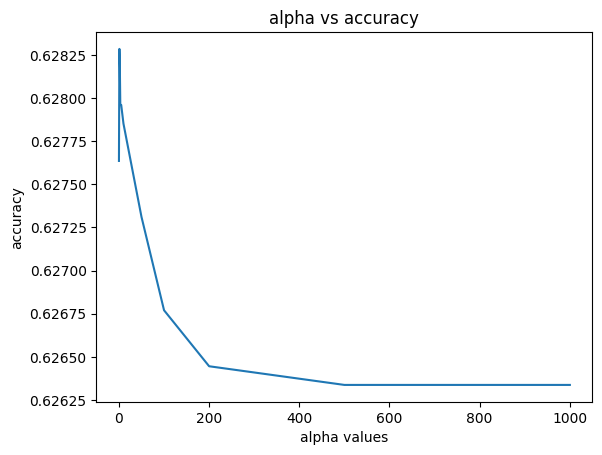

In [22]:
import matplotlib.pyplot as plt
plt.plot(alphas,Calculated_accuracies)
plt.xlabel('alpha values')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy')
plt.show()

In [23]:
for cls in likelihoods.keys():
    words=[word[0] for word in sorted (likelihoods [cls].items () , key=lambda x: x [1], reverse=True) [:10]]
    print("Popular Top 10 words in the class ",cls," are : ", words)

Popular Top 10 words in the class  0  are :  ['the', 'to', 'a', 'and', 'of', 'that', 'is', 'in', 'be', 'it']
Popular Top 10 words in the class  1  are :  ['and', 'to', 'the', 'a', 'of', 'in', 'that', 'is', 'for', 'be']


In [24]:
test_df['Predicted']=test_df['text'].apply(predict,alpha=1)
Accuracy=(test_df['generated']==test_df['Predicted']).sum()/test_df.shape[0]
print("Accuracy of the model with best alpha value as ",1," is ",Accuracy)

Accuracy of the model with best alpha value as  1  is  0.6263379824845929


In [25]:
Actual_test_data=pd.read_csv('test_essays.csv',index_col=0)

In [26]:
Actual_test_data['Predicted']=Actual_test_data['text'].apply(predict,alpha=1)

In [27]:
Actual_test_data['Predicted'] = Actual_test_data['Predicted'].apply(int)
pd.DataFrame({'id': Actual_test_data["prompt_id"], 'generated': Actual_test_data["Predicted"]}).to_csv('submission.csv', index=False)